In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import seaborn as sns

#main xtics#

- location
- size
- rooms
- resouses (e.g water, electricy)


In [301]:
df = pd.read_csv('Housing1.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [302]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [303]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Figure size 1000x2000 with 0 Axes>

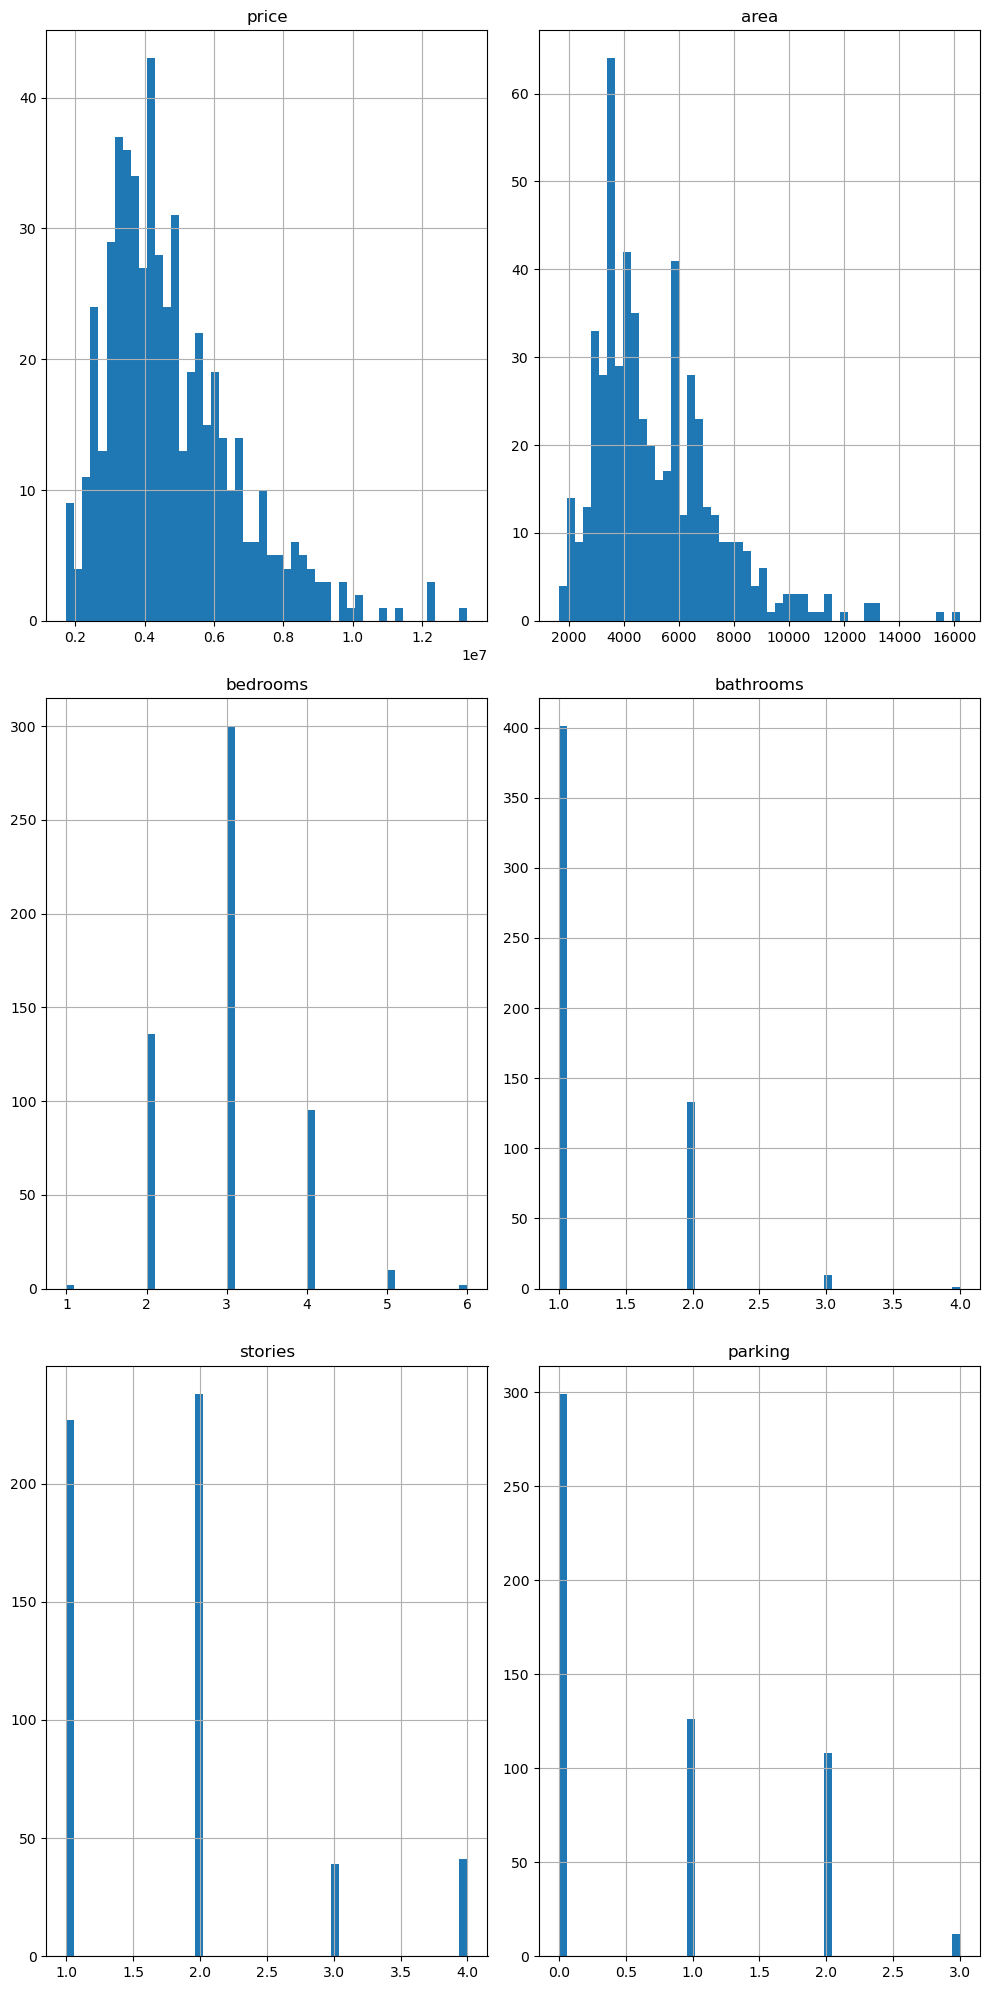

In [304]:
plt.figure(figsize=(10, 20))  # Use figsize directly on figure()
df.hist(figsize=(10, 20), bins=50)  # Include bins to get an accurate histogram
plt.tight_layout()
plt.show()

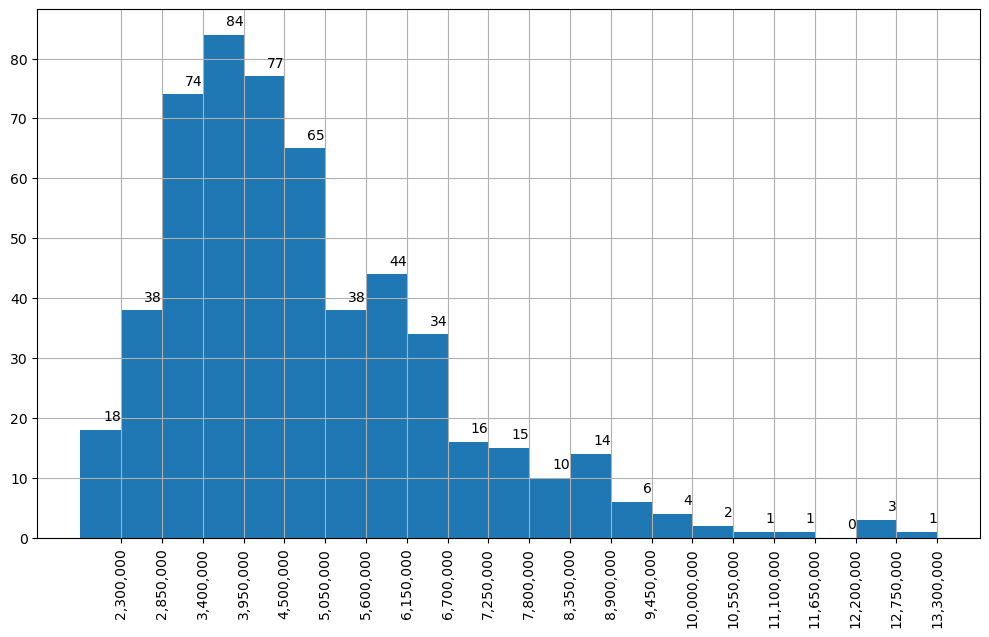

In [305]:

plt.figure(figsize=(10, 6))
df['price'].hist(bins=21, align = 'left')
plt.tight_layout()

# Get the counts for each bin
n, bins = np.histogram(df['price'], bins=21)

# Calculate the tick locations based on bin edges
ticks = (bins[1:] + bins[:-1]) / 2

# Loop through each bar and display the count
for i in range(len(bins) - 1):
    height = n[i]
    plt.text(ticks[i], height + 1, str(height), ha='right', va='bottom')

plt.xticks(ticks, [f'{int(b):,}' for b in bins[1:]], rotation=90)
plt.show()


In [306]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [307]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# label encoding 
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})

#one hot encoding
df = pd.get_dummies(df, columns=['furnishingstatus'])

df['furnishingstatus_furnished'] = df['furnishingstatus_furnished'].map({True: 1, False: 0})
df['furnishingstatus_semi-furnished'] = df['furnishingstatus_semi-furnished'].map({True: 1, False: 0})
df['furnishingstatus_unfurnished'] = df['furnishingstatus_unfurnished'].map({True: 1, False: 0})




In [309]:
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [310]:
from sklearn.preprocessing import StandardScaler

# Separate the numerical features from the target variable (if any)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform your data using the scaler
scaled_data = pd.DataFrame(scaler.fit_transform(df[numerical_features]))

# Add the scaled data back to the original DataFrame with the categorical columns intact
df_scaled = df.copy()
df_scaled[numerical_features] = scaled_data

print(df_scaled.head())

# Save the scaled data to a new CSV file
df_scaled.to_csv('scaled_data.csv', index=False)
df = pd.read_csv('scaled_data.csv')
df


      price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  4.566365  1.046726  1.403419   1.421812  1.378217  0.405623  -0.465315   
1  4.004484  1.757010  1.403419   5.405809  2.532024  0.405623  -0.465315   
2  4.004484  2.218232  0.047278   1.421812  0.224410  0.405623  -0.465315   
3  3.985755  1.083624  1.403419   1.421812  0.224410  0.405623  -0.465315   
4  3.554979  1.046726  1.403419  -0.570187  0.224410  0.405623   2.149083   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0 -0.734539        -0.219265         1.472618  1.517692  1.804941   
1 -0.734539        -0.219265         1.472618  2.679409 -0.554035   
2  1.361397        -0.219265        -0.679063  1.517692  1.804941   
3  1.361397        -0.219265         1.472618  2.679409  1.804941   
4  1.361397        -0.219265         1.472618  1.517692 -0.554035   

   furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                    1.700840                        -0.

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,1.700840,-0.844888,-0.696429
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,1.700840,-0.844888,-0.696429
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.587945,1.183588,-0.696429
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,1.700840,-0.844888,-0.696429
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,1.700840,-0.844888,-0.696429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,-0.587945,-0.844888,1.435896
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.587945,1.183588,-0.696429
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.587945,-0.844888,1.435896
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.700840,-0.844888,-0.696429


In [311]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.053179,-0.094086


In [312]:
corr_matrix['price']

price                              1.000000
area                               0.535997
bedrooms                           0.366494
bathrooms                          0.517545
stories                            0.420712
mainroad                           0.296898
guestroom                          0.255517
basement                           0.187057
hotwaterheating                    0.093073
airconditioning                    0.452954
parking                            0.384394
prefarea                           0.329777
furnishingstatus_furnished         0.229350
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64

In [316]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Your selected features
features = ['area', 'bathrooms', 'stories', 'parking', 'bedrooms',
            'mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea',
            'furnishingstatus_furnished', 'furnishingstatus_semi-furnished']
# Select only those columns from your main DataFrame
selected = df[features]

# Add constant (intercept term) for statsmodels
X = add_constant(selected)

# Create VIF DataFrame
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display result
print(vif_data)


                            Feature       VIF
0                             const  1.000000
1                              area  1.325250
2                         bathrooms  1.286621
3                           stories  1.478055
4                           parking  1.212837
5                          bedrooms  1.369477
6                          mainroad  1.172728
7                         guestroom  1.212838
8                          basement  1.323050
9                   hotwaterheating  1.041506
10                  airconditioning  1.211840
11                         prefarea  1.149196
12       furnishingstatus_furnished  1.453077
13  furnishingstatus_semi-furnished  1.384513


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


✅ Evaluation Metrics:
• MAE  = 0.52
• RMSE = 0.71
• R²   = 0.6529


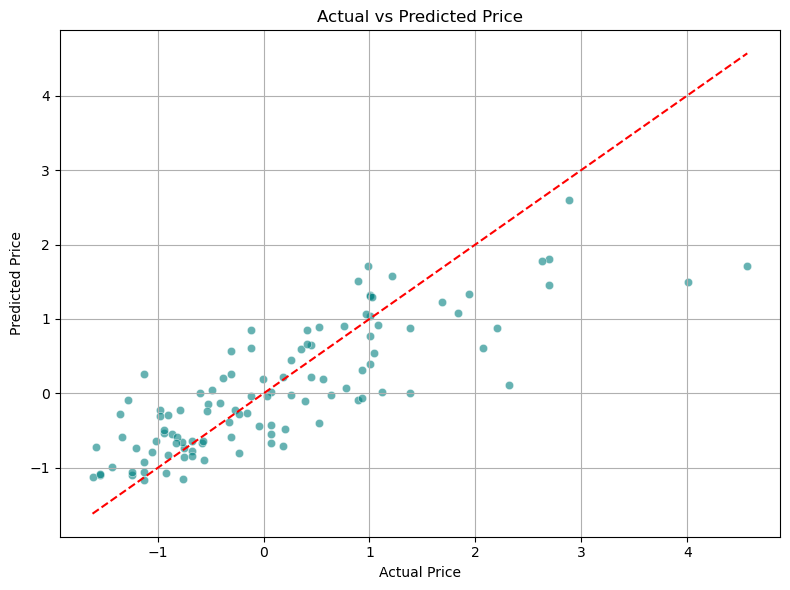

In [324]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = ['area', 'bathrooms', 'stories', 'parking', 'bedrooms',
            'mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea',
            'furnishingstatus_furnished', 'furnishingstatus_semi-furnished']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"✅ Evaluation Metrics:")
print(f"• MAE  = {mae:.2f}")
print(f"• RMSE = {rmse:.2f}")
print(f"• R²   = {r2:.4f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="teal", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


In [322]:
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("\n📊 Model Coefficients:")
print(coeff_df)



📊 Model Coefficients:
                            Feature  Coefficient
0                              area     0.273778
1                         bathrooms     0.294009
2                           stories     0.188984
3                           parking     0.103570
4                          bedrooms     0.030296
5                          mainroad     0.068577
6                         guestroom     0.047407
7                          basement     0.099637
8                   hotwaterheating     0.076648
9                   airconditioning     0.196828
10                         prefarea     0.142888
11       furnishingstatus_furnished     0.096711
12  furnishingstatus_semi-furnished     0.075650
